<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/covid_municipal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates


In [2]:
#!git clone "https://github.com/mauforonda/covid19bolivia-municipal"

In [3]:
#!git --help

In [4]:
departamentos = ["la_paz","cochabamba","santa_cruz","oruro","potosi","tarija","chuquisaca","beni","pando"]

for i in range(9):
  departamentos[i] = pd.read_csv("https://raw.githubusercontent.com/mauforonda/covid19bolivia-municipal/master/{}.csv".format(departamentos[i]))

df = pd.concat(departamentos[0:9])
df

,fecha,cod_ine,municipio,confirmados
0,2020-03-19,20101,Nuestra Señora de La Paz,1
1,2020-03-24,20101,Nuestra Señora de La Paz,1
2,2020-03-24,21701,Copacabana,1
3,2020-03-25,20101,Nuestra Señora de La Paz,1
4,2020-03-26,20101,Nuestra Señora de La Paz,2
...,...,...,...,...
765,2021-08-23,90101,Cobija,5
766,2021-08-24,90302,San Lorenzo,2
767,2021-08-25,90101,Cobija,3
768,2021-08-26,90101,Cobija,3


In [5]:
sdsn = pd.read_csv("https://github.com/mauforonda/covidenbolivia/raw/master/scripts/municipios_heatmap/sdsn.gen.csv")
sdsn

,cod_ine,municipio,departamento,sdi,poblacion,urbanizacion
0,10101,Sucre,Chuquisaca,69.582053,295476,91.4
1,10102,Yotala,Chuquisaca,55.501551,10017,0.0
2,10103,Poroma,Chuquisaca,35.662371,18947,0.0
3,10201,Azurduy,Chuquisaca,37.926692,10948,0.0
4,10202,Tarvita,Chuquisaca,39.974894,14688,0.0
...,...,...,...,...,...,...
334,90401,Santa Rosa,Pando,48.207247,2506,0.0
335,90402,Ingavi,Pando,43.623216,1840,0.0
336,90501,Nueva Esperanza,Pando,46.017078,2422,0.0
337,90502,Villa Nueva-Loma Alta,Pando,43.039756,3209,0.0


In [6]:
df_merge = pd.merge(df, sdsn, on="cod_ine")
df_merge

,fecha,cod_ine,municipio_x,confirmados,municipio_y,departamento,sdi,poblacion,urbanizacion
0,2020-03-19,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
1,2020-03-24,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2,2020-03-25,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
3,2020-03-26,20101,Nuestra Señora de La Paz,2,La Paz,La Paz,80.151007,816044,99.0
4,2020-03-28,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
...,...,...,...,...,...,...,...,...,...
27462,2021-04-02,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
27463,2021-04-03,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
27464,2021-04-23,90402,Ingavi,3,Ingavi,Pando,43.623216,1840,0.0
27465,2021-04-26,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0


In [7]:
df_merge.to_csv("casos_municipios_completo.csv")

In [8]:
print(df_merge.cod_ine.value_counts())
print(df_merge.municipio_y.value_counts())
print(df_merge.municipio_x.value_counts())

list_municipio_x = df_merge.municipio_x.value_counts().index.array

70101    499
20101    481
20105    472
40101    458
30101    454
        ... 
20603      1
31303      1
20308      1
20605      1
20604      1
Name: cod_ine, Length: 326, dtype: int64
Santa Cruz de la Sierra    499
La Paz                     481
El Alto                    472
Oruro                      458
Cochabamba                 454
                          ... 
Alalay                       1
Combaya                      1
Tacacoma                     1
Quiabaya                     1
Callapa                      1
Name: municipio_y, Length: 320, dtype: int64
Santa Cruz de la Sierra     499
Nuestra Señora de La Paz    481
El Alto                     472
Oruro                       458
Cochabamba                  454
                           ... 
Alalay                        1
Combaya                       1
Santiago de Callapa           1
Tacacoma                      1
Quiabaya                      1
Name: municipio_x, Length: 315, dtype: int64


In [9]:
for i in range(len(list_municipio_x)):
  df_alt = df_merge.set_index("municipio_x")
  df_alt = df_alt.loc[[list_municipio_x[i]]]
  df_alt.to_csv("casos_municipios/{}.csv".format(list_municipio_x[i]))

df_alt = df_merge.groupby(["municipio_x","fecha"]).head()
df_alt = df_merge.set_index("fecha")
df_alt

,cod_ine,municipio_x,confirmados,municipio_y,departamento,sdi,poblacion,urbanizacion
fecha,,,,,,,,
2020-03-19,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2020-03-24,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2020-03-25,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2020-03-26,20101,Nuestra Señora de La Paz,2,La Paz,La Paz,80.151007,816044,99.0
2020-03-28,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
...,...,...,...,...,...,...,...,...
2021-04-02,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
2021-04-03,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
2021-04-23,90402,Ingavi,3,Ingavi,Pando,43.623216,1840,0.0


In [10]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

colors



['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

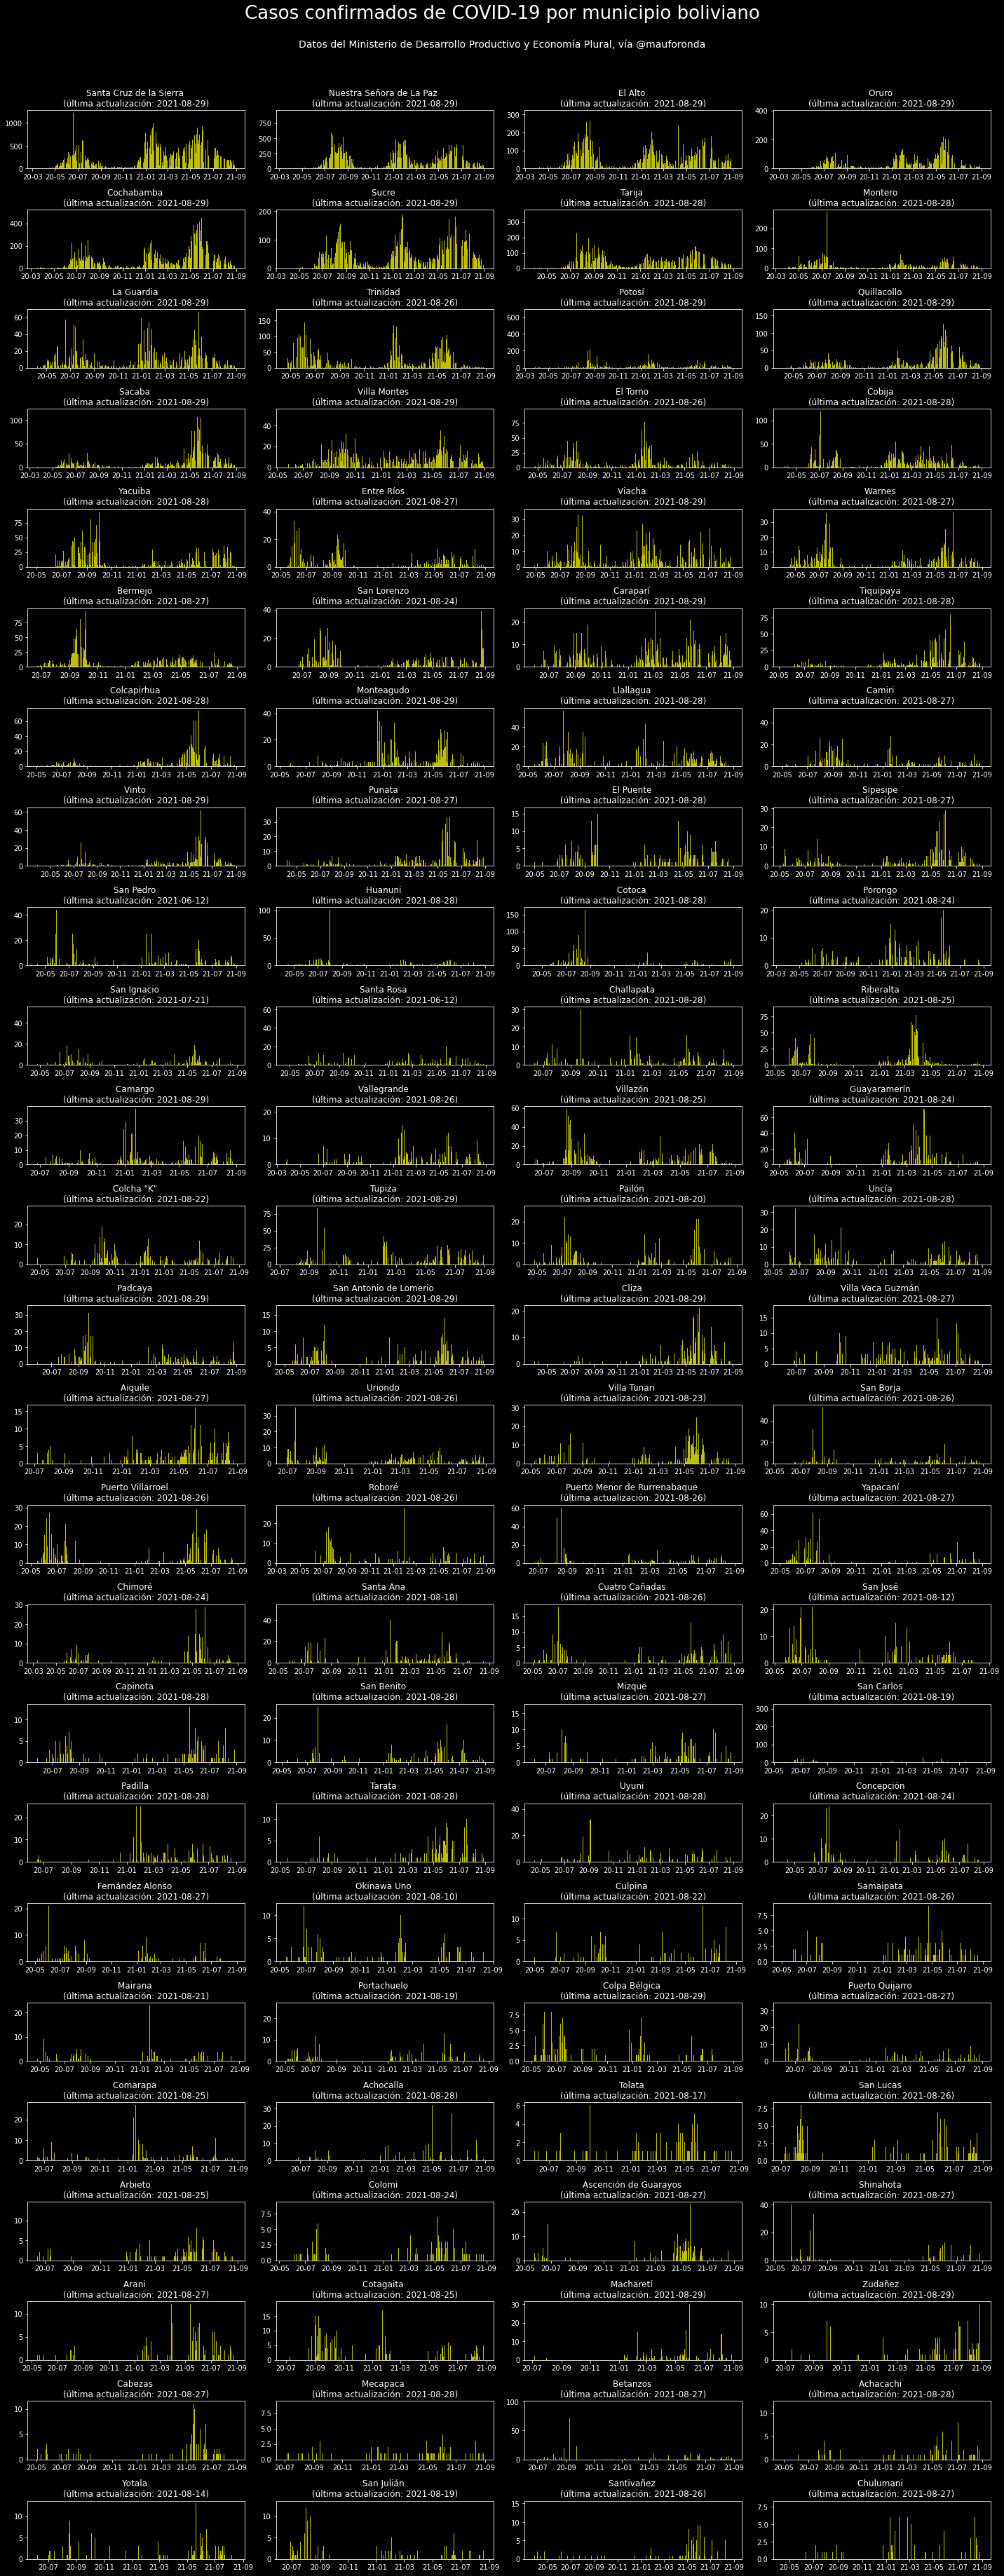

In [11]:
total = 100
nrows = 25
ncols = 4
plt.style.use("dark_background")


fig, axs = plt.subplots(nrows, ncols, figsize = (20,50), sharex=False)
axs = axs.flatten()

fig.suptitle("Casos confirmados de COVID-19 por municipio boliviano", fontsize = 26, y = 1.02)
fig.text(0.5,1.003,"Datos del Ministerio de Desarrollo Productivo y Economía Plural, vía @mauforonda",ha="center", fontsize = 14)

for i in range(100):
  #df_by_mun = pd.read_csv("{}.csv".format(list_municipio_x[i]))
  df_by_mun = df_alt.groupby("municipio_x").get_group("{}".format(list_municipio_x[i]))
  #x= df_by_mun.fecha.array
  df_by_mun.index = pd.to_datetime(df_by_mun.index, format="%Y-%m-%d")
  x= df_by_mun.index
  y= df_by_mun.confirmados
  #df_by_mun.set_index("fecha")

  axs[i].bar(x,y, zorder=2, color="y")
  axs[i].set_title("{} \n(última actualización: {})".format(list_municipio_x[i], 
                   x[-1].date()))

  #axs[i].plot(df_by_mun.confirmados.rolling(7).mean(), zorder=3, color="r")

  axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

fig.tight_layout()

In [12]:
fig.savefig("confirmados_municipal.svg", bbox_inches="tight")

In [13]:
fig.savefig("confirmados_municipal.jpg", bbox_inches="tight")